In [71]:
from scipy import stats
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import statsmodels.graphics as smg
format = "Chi Square: {0}\np-value: {1}"# "\nArray: {2}"

In [2]:
a=stats.chi2.cdf(2 , 2)
b=stats.chi2.cdf(4 , 2)
c=b-a
print(a)
print(b)
print(c)

0.6321205588285577
0.8646647167633873
0.23254415793482963


### D6

In [3]:
expect = pd.DataFrame([10,10,10,10,10,10])

In [4]:
observed = pd.DataFrame([10,10,10,5,10,15])

In [5]:
res = stats.chisquare(f_obs=observed, f_exp=expect)

In [6]:
print(format.format(res[0], res[1]))

Chi Square: [5.]
p-value: [0.41588019]


### Political party

In [7]:
expect = pd.DataFrame([30, 30, 30])

In [8]:
observed = pd.DataFrame([10, 30, 50])

In [9]:
res = stats.chisquare(f_obs=observed, f_exp=expect)

In [10]:
print(format.format(res[0], res[1]))

Chi Square: [26.66666667]
p-value: [1.61959679e-06]


### Gender Difference

In [11]:
expect = pd.DataFrame([12, 12])

In [12]:
observed = pd.DataFrame([15, 9])

In [13]:
res = stats.chisquare(f_obs=observed, f_exp=expect)

In [14]:
print(format.format(res[0], res[1]))

Chi Square: [1.5]
p-value: [0.22067136]


### Snowden

1500 - group size
53% - postive
47% - negative

In [15]:
group_size = 1500
pos = (group_size/100)*53
neg = group_size - pos

In [16]:
expect = pd.DataFrame([group_size/2, group_size/2])

In [17]:
observed = pd.DataFrame([pos, neg])

In [18]:
res = stats.chisquare(f_obs=observed, f_exp=expect)

In [19]:
print(format.format(res[0], res[1]))

Chi Square: [5.4]
p-value: [0.02013675]


### Contingency table

In [20]:
format = "Chi Square: {0}\np-value: {1}\nDegree of Freedom:{2}\nArray:\n{3}"

In [21]:
observed = pd.DataFrame([[10, 6], [5, 15]])

In [22]:
res = stats.chi2_contingency(observed)

In [23]:
print(format.format(res[0], res[1], res[2], res[3]))

Chi Square: 3.715714285714286
p-value: 0.053902557169387154
Degree of Freedom:1
Array:
[[ 6.66666667  9.33333333]
 [ 8.33333333 11.66666667]]


### Gender Difference Pt.2

In [24]:
man_tot = 26
wom_tot = 15
bio_tot = 24
inf_tot = 17
man_proc = (man_tot/(man_tot+wom_tot)) * 100
wom_proc = 100 - man_proc
freq_man_bio = bio_tot/100 * man_proc
freq_wom_bio = bio_tot - freq_man_bio
freq_man_inf = inf_tot/100 * man_proc
freq_wom_inf = inf_tot - freq_man_inf
print(f"man_proc: {man_proc}")
print(f"wom_proc: {wom_proc}")
print(f"freq_man_bio: {freq_man_bio}")
print(f"freq_wom_bio: {freq_wom_bio}")
print(f"freq_man_inf: {freq_man_inf}")
print(f"freq_wom_inf: {freq_wom_inf}")

man_proc: 63.41463414634146
wom_proc: 36.58536585365854
freq_man_bio: 15.21951219512195
freq_wom_bio: 8.78048780487805
freq_man_inf: 10.78048780487805
freq_wom_inf: 6.2195121951219505


In [25]:
observed = pd.DataFrame([[15, 9], [11, 6]])
observed

,0,1
0,15,9
1,11,6


In [26]:
expect = pd.DataFrame([[freq_man_bio, freq_wom_bio], [freq_man_inf, freq_wom_inf]])
expect

,0,1
0,15.219512,8.780488
1,10.780488,6.219512


In [27]:
pd.DataFrame(stats.contingency.expected_freq(observed))

,0,1
0,15.219512,8.780488
1,10.780488,6.219512


In [28]:
res = stats.chi2_contingency(observed=observed)

In [29]:
print(format.format(res[0], res[1], res[2], res[3]))

Chi Square: 0.0340764831573656
p-value: 0.8535442239746989
Degree of Freedom:1
Array:
[[15.2195122  8.7804878]
 [10.7804878  6.2195122]]


### Breaks

In [30]:
breaks =  pd.DataFrame([[20, 15], [11, 12], [7, 9]])

In [31]:
res = stats.chi2_contingency(observed=breaks, correction=True)

In [32]:
print(format.format(res[0], res[1], res[2], res[3]))

Chi Square: 0.9544070774762996
p-value: 0.6205162173513055
Degree of Freedom:2
Array:
[[17.97297297 17.02702703]
 [11.81081081 11.18918919]
 [ 8.21621622  7.78378378]]


###  Aspirine

In [33]:
pills = pd.DataFrame([[18, 7], [6, 13]])

In [34]:
res = stats.chi2_contingency(observed=pills, correction=True)

In [35]:
print(format.format(res[0], res[1], res[2], res[3]))

Chi Square: 5.57719298245614
p-value: 0.018195864430772903
Degree of Freedom:1
Array:
[[13.63636364 11.36363636]
 [10.36363636  8.63636364]]


In [36]:
pills

,0,1
0,18,7
1,6,13


In [37]:
pills = pills.rename(columns={0:"Trombosis", 1:"Normal"})
pills[0] = ["Placebo", "Aspirine"]
pills = pills.set_index(0)
pills

,Trombosis,Normal
0,,
Placebo,18,7
Aspirine,6,13


In [82]:
pill_data = {('Normal', 'Placebo'): 18,
             ('Normal', 'Aspirine'): 7,
             ('Trombosis', 'Placebo'): 6,
             ('Trombosis', 'Aspirine'): 13,
            }

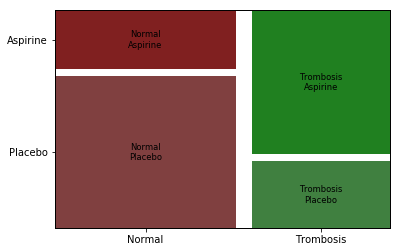

In [83]:
my_plot = smg.mosaicplot.mosaic(pill_data, gap=.05)